In [1]:
import spot
from buddy import bdd_ithvar

def create_kripke(bdddict, name_states=False):
    k = spot.make_kripke_graph(bdddict)
    a = bdd_ithvar(k.register_ap("a"))
    b = bdd_ithvar(k.register_ap("b"))
    c = bdd_ithvar(k.register_ap("c"))
    m = bdd_ithvar(k.register_ap("m"))
    dead = bdd_ithvar(k.register_ap("dead"))

    z0 = k.new_state(a & -b & -c & -dead & -m);
    z1 = k.new_state(a & -b & -c & -dead& -m);
    z2 = k.new_state(a & b & c & -dead& -m);
    z3 = k.new_state(a & b & -c & -dead& -m);
    z4 = k.new_state(a & -b & -c & -dead& -m);
    z5 = k.new_state(-a & -b & c & -dead& -m);
    z6 = k.new_state(-a & b & -c & -dead& -m);
    z7 = k.new_state(a & b & -c & -dead& -m);
    z8 = k.new_state(a & -b & -c & -dead & m);
    z9 = k.new_state(dead);

    k.set_init_state(z0);

    k.new_edge(z0, z1); k.new_edge(z0, z2); k.new_edge(z0, z3);
    k.new_edge(z1, z4);
    k.new_edge(z2, z5); k.new_edge(z2, z6);
    k.new_edge(z3, z6);
    k.new_edge(z4, z7);
    k.new_edge(z5, z7);
    k.new_edge(z6, z8);
    k.new_edge(z7, z9);
    k.new_edge(z8, z9);
    k.new_edge(z9, z9);
 
    if name_states:
        k.set_state_names(["z0", "z1", "z2",
                           "z3", "z4", "z5",
                           "z6", "z7", "z8", "z9"])
    return k;

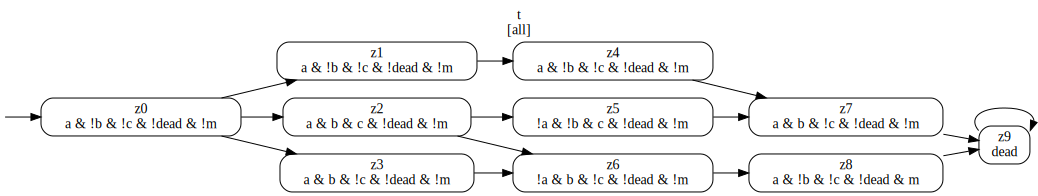

In [2]:
# create kripke structure, z1-z2 are the states of the system, z9 is appended to handle finite trace LTL
k = create_kripke(spot.make_bdd_dict(), True); k

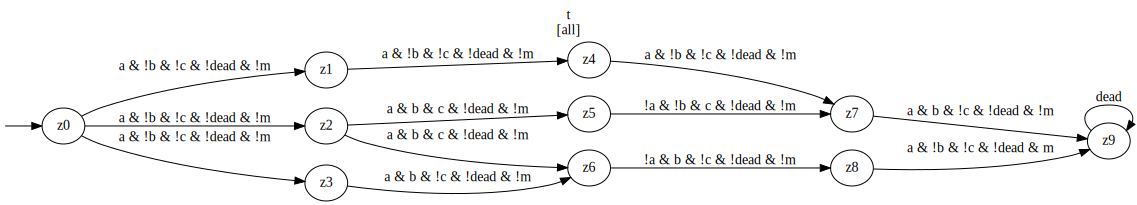

In [3]:
ts = spot.automaton(k.to_str('hoa'), want_kripke=False);ts

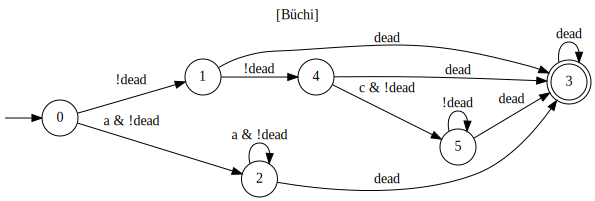

In [34]:
# suppose this is the formula that we are intersted in, we assume directly computing the product
# of this rule will be more time consuming than separating it into smaller clauses
f = spot.from_ltlf('Ga | (XXc)', "!dead")
ltl = f.translate(); ltl

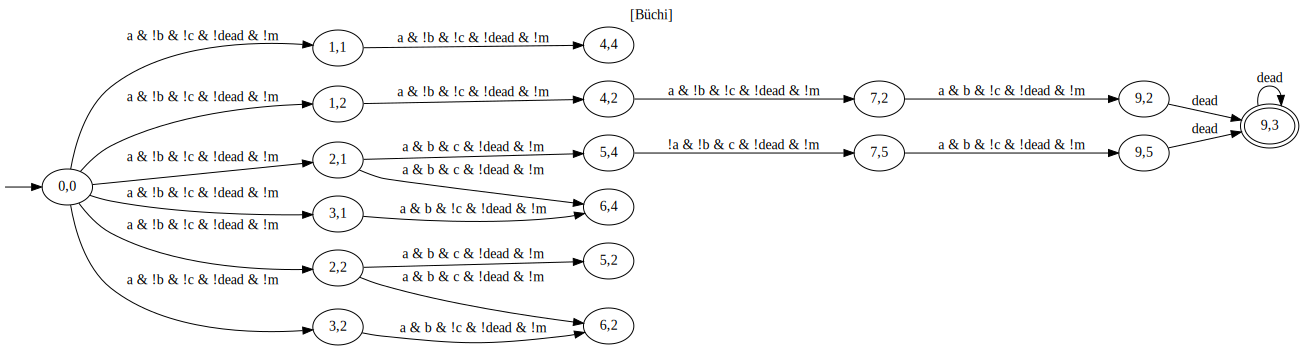

In [35]:
# we obtain two accepting runs, namely [0,1,4,7,9] and [0,2,5,7,9]
product_automaton = spot.product(ts, ltl); product_automaton

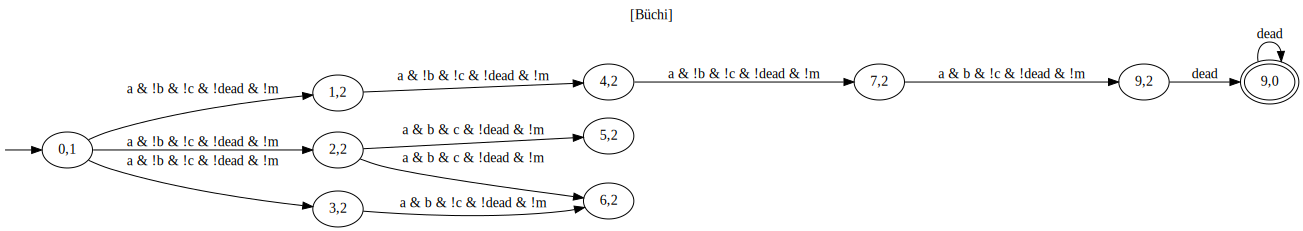

In [30]:
# we can compute the accepting runs separately, this is the first clause
# we obtain one accepting runs namely [0,1,4,7,9]
f = spot.from_ltlf('Ga', "!dead")
ltl = f.translate(); ltl
product_automaton1 = spot.product(ts, ltl); product_automaton1

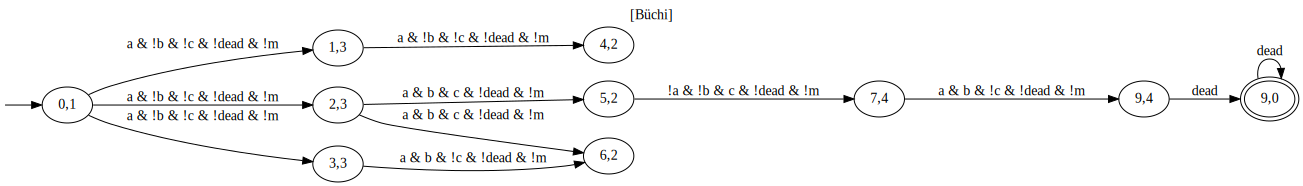

In [31]:
# we can compute the accepting runs separately, this is the second clause
# we obtain one accepting run, namely [0,2,5,7,9]
f = spot.from_ltlf('(XXc)', "!dead")
ltl = f.translate(); ltl
product_automaton = spot.product(ts, ltl); product_automaton

In [24]:
# question 1: does Spot support union/intersection operations on the automaton, so that we can derive the
# accepting runs of the formula "Ga | (XXc)" from those of "Ga" and "'(XXc)"?
# something like [0,1,4,7,9] U [0,2,5,7,9] = [0,1,4,7,9], [0,2,5,7,9]


# question 2: if yes, how about for "Ga & (XXc)"? something like [0,1,4,7,9] intersects [0,2,5,7,9] = empty